### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [40]:
# first we will look for missing values based on columns
missing_values = data.isnull().sum()

missing_values = missing_values[missing_values > 0]
print(missing_values)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


Based on the results,  we see that the car column is missing the most values. The rest are missing values but not a substantial amount

3. Decide what to do about your missing data -- drop, replace, other...

 We will drop the car column since it has a substantial amount of missing data and we will use the mode for the missing values in the rest of the columns

In [58]:


data_cleaned = data.drop(columns=['car'])


columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_to_impute:
    mode_value = data_cleaned[column].mode()[0]  # Find the mode
    data_cleaned[column].fillna(mode_value, inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [60]:
# we will achieve the number of accepted coupons and divide that by the total observations to acheive our answer
total_observations = len(data_cleaned)


accepted_coupons = data_cleaned['Y'].sum()


proportion_accepted = accepted_coupons / total_observations


print(proportion_accepted)

0.5684326710816777


 the total amount accepted is 56.84%

5. Use a bar plot to visualize the `coupon` column.

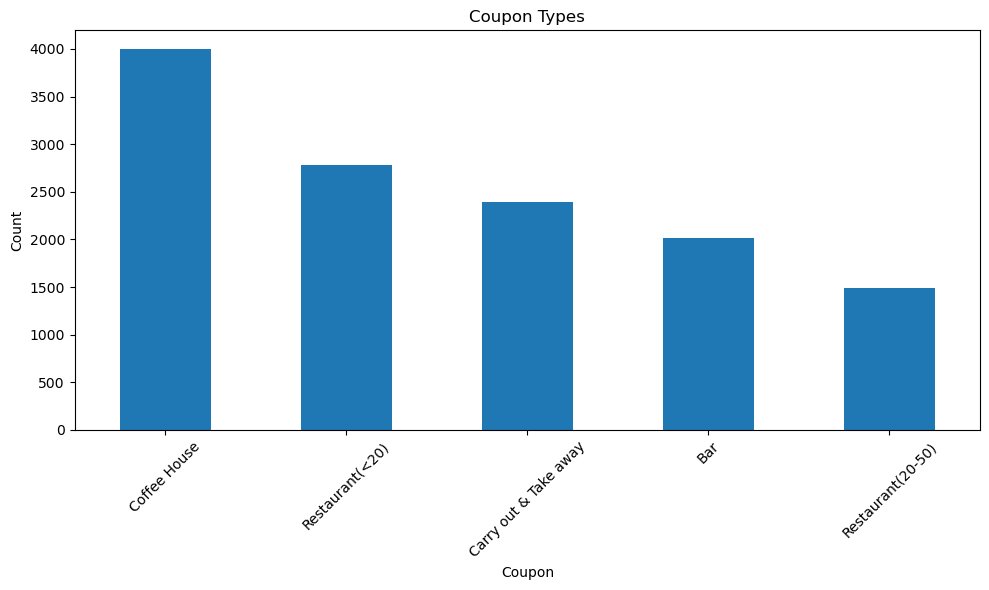

In [62]:
import matplotlib.pyplot as plt


coupon_counts = data_cleaned['coupon'].value_counts()


plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar')
plt.title('Coupon Types')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

6. Use a histogram to visualize the temperature column.

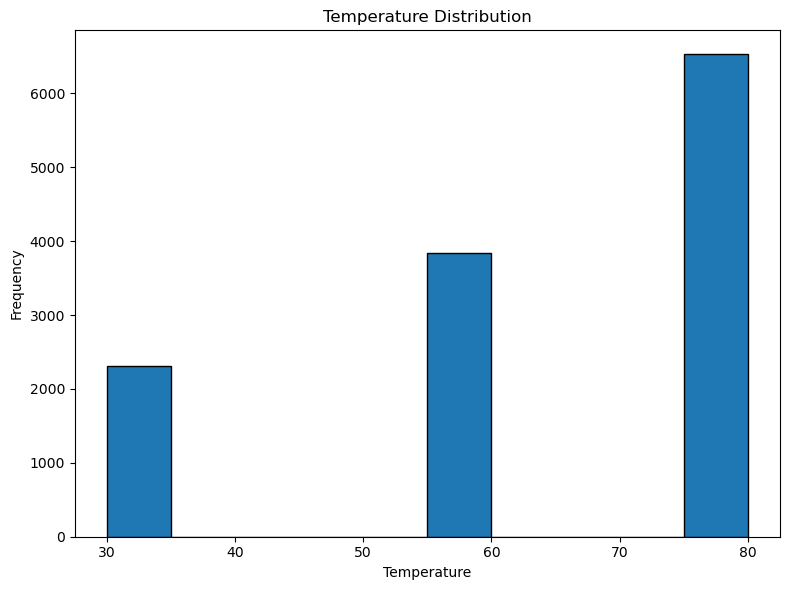

In [54]:

plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['temperature'], bins=10, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()


plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


The below code will create a new data frame that will be the basis for our data analysis on bar coupons.

In [64]:

bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']


bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


First, we calculate the total number of bar-related coupons issued and then the number of accepted bar coupons. Then, we calculate the proportion by dividing the amount of accepted coupons and divide it by the total amount of coupons.

In [78]:

total_bar_coupons = len(bar_coupons_df)


accepted_bar_coupons = bar_coupons_df['Y'].sum()


proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons


print(proportion_accepted_bar)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


First, we create a subset of bar_few_visits to only contain people who have gone to the bar 3 or fewer times. This contains categories such as never, less1 and 1~3. The other subset is the opposite only containing people who have gone to the bare more than 3 times. Since the Y column is in binary values (Yes or No) for this dataset, the mean function can be used to calculate the acceptance rate. From the results, we see that the acceptance rate is much higher for frequent bar visitors.

In [80]:

bar_few_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]


bar_frequent_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]


acceptance_rate_few_visits = bar_few_visits['Y'].mean()
acceptance_rate_frequent_visits = bar_frequent_visits['Y'].mean()


print(acceptance_rate_few_visits, acceptance_rate_frequent_visits)

0.37073707370737075 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The dataset has non-numeric values for age such as 50plus and below21. I think it is best to assign these values as one year below 20 and 50 respectively. Once this is complete, we create two subsets. One is for drivers who go to bars more than once and are over the age of 25. The other group is for all other drivers who are under 25 or who go to the bare ounce or less. We see from the results that drivers who are over 25 and visit bars frequently are more likely to accept coupons than those who are not a part of either of those categories.

In [82]:

bar_coupons_df['age_cleaned'] = bar_coupons_df['age'].replace({'50plus': '50', 'below21': '20'}).astype(int)


over_25_frequent_bar = bar_coupons_df[(bar_coupons_df['Bar'].isin(['4~8', 'gt8', '1~3'])) & (bar_coupons_df['age_cleaned'] > 25)]


others = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['4~8', 'gt8', '1~3'])) & (bar_coupons_df['age_cleaned'] > 25))]


acceptance_rate_over_25_frequent_bar = over_25_frequent_bar['Y'].mean()
acceptance_rate_others = others['Y'].mean()


acceptance_rate_over_25_frequent_bar, acceptance_rate_others

(0.6952380952380952, 0.33500313087038197)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Again, we create two subsets. One contains drivers who met the criteria above. The other subset is all other drivers who did not meet the criteria above. Then, we calculate the acceptance rate for each subset. From the results, we see that frequent bar goers who do not have kids, and do not have rural jobs are more likely to accept the coupon

In [84]:
[
    (bar_coupons_df['Bar'].isin(['4~8', 'gt8', '1~3'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)') & 
    (~bar_coupons_df['occupation'].isin(['Farming, Fishing & Forestry']))
]


others_non_kid_or_agriculture = bar_coupons_df[~(
    (bar_coupons_df['Bar'].isin(['4~8', 'gt8', '1~3'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)') & 
    (~bar_coupons_df['occupation'].isin(['Farming, Fishing & Forestry']))
)]


acceptance_rate_frequent_bar_non_kid_non_agriculture = frequent_bar_non_kid_passenger_non_agriculture['Y'].mean()
acceptance_rate_others_non_kid_or_agriculture = others_non_kid_or_agriculture['Y'].mean()


acceptance_rate_frequent_bar_non_kid_non_agriculture, acceptance_rate_others_non_kid_or_agriculture

(0.7132486388384754, 0.296043656207367)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



First, we set the conditions based on the conditions that were described. Then, we group all those conditions with an or function to create a subset that contains drivers who meet any of these conditions. Then, we created another subset of drivers who did not meet any conditions. The results indicate that drivers who are younger and make less money are more likely to accept the coupon.

In [86]:

condition_1 = (
    (bar_coupons_df['Bar'].isin(['4~8', 'gt8', '1~3'])) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
)


condition_2 = (
    (bar_coupons_df['Bar'].isin(['4~8', 'gt8', '1~3'])) &
    (bar_coupons_df['age_cleaned'] < 30)
)


condition_3 = (
    (bar_coupons_df['RestaurantLessThan20'] == '4~8') &
    (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)


group_1 = bar_coupons_df[condition_1 | condition_2 | condition_3]


group_2 = bar_coupons_df[~(condition_1 | condition_2 | condition_3)]


acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

acceptance_rate_group_1, acceptance_rate_group_2

(0.6025280898876404, 0.3049808429118774)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I had three main takeaways from our observations. The first is that frequent bar goers are most likley to accept the coupons. This indicates that people who already go to bars get excited to get coupons to bars that they already attend. The second takeaway is that younger drivers were more likley to accept the coupon. This indicates the coupon matches their incentive to have fun and save money when they generally have lower income. Lastly, drivers with lower incomes were likely to accept the coupon. This indicates the idea that coupons are a great way to attract customers on the idea that it will be less compromising to their budgets.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I did some analysis on coffee coupons. 

In [38]:

coffee_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Coffee House']


acceptance_rate_coffee = coffee_coupons_df['Y'].mean()
print("Overall Acceptance Rate:", acceptance_rate_coffee)


acceptance_by_passenger = coffee_coupons_df.groupby('passanger')['Y'].mean()
print("\nAcceptance by Passenger Type:")
print(acceptance_by_passenger)


coffee_coupons_df['age_cleaned'] = coffee_coupons_df['age'].replace({'50plus': '50', 'below21': '20'}).astype(int)
acceptance_by_age = coffee_coupons_df.groupby('age_cleaned')['Y'].mean()
print("\nAcceptance by Age:")
print(acceptance_by_age)


acceptance_by_income = coffee_coupons_df.groupby('income')['Y'].mean()
print("\nAcceptance by Income:")
print(acceptance_by_income)

Overall Acceptance Rate: 0.49924924924924924

Acceptance by Passenger Type:
passanger
Alone        0.437943
Friend(s)    0.596906
Kid(s)       0.483092
Partner      0.570492
Name: Y, dtype: float64

Acceptance by Age:
age_cleaned
20    0.696774
21    0.524349
26    0.514828
31    0.476726
36    0.467662
41    0.501538
46    0.513636
50    0.420183
Name: Y, dtype: float64

Acceptance by Income:
income
$100000 or More     0.494382
$12500 - $24999     0.540404
$25000 - $37499     0.473438
$37500 - $49999     0.542373
$50000 - $62499     0.503650
$62500 - $74999     0.436364
$75000 - $87499     0.296610
$87500 - $99999     0.557196
Less than $12500    0.551948
Name: Y, dtype: float64


 I had similar takeaways from bar coupons and coffee coupons. I realized for both coffee coupons and bar coupons that social influence is a big indicator of coupon use. People with friends, partners, and kids had higher acceptance rates for this coupon. I had not considered the social influence as much during the bar coupons analysis. The takeaways of age and income were the same as the bar coupons analysis. We see that younger people are more likely to accept coupons due to the low income and spontaneity that young people have. This leads me to income. Low income was more likely to accept the coupon. This shows interest in customers looking to enjoy coffee within the parameters of their budget.